## Эксперимент на peppers & flower

In [1]:
from src import HybridMetaheuristic


model = HybridMetaheuristic("pic/peppers.png", "pic/flower.png")

/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
model.evolution()

  0%|                                                                  | 0/100 [00:00<?, ?it/s]

Best score: 2.4923185781064854


  1%|▌                                                      | 1/100 [02:24<3:58:00, 144.24s/it]

Best score: 2.4707765062381872


 10%|█████▍                                                | 10/100 [23:08<3:25:44, 137.16s/it]

Best score: 2.4596889159935005


 12%|██████▍                                               | 12/100 [25:29<2:30:53, 102.88s/it]

Best score: 2.455575411736686


 19%|██████████▍                                            | 19/100 [34:28<1:48:07, 80.09s/it]

Best score: 2.455128083818963


 21%|███████████▌                                           | 21/100 [37:03<1:43:02, 78.26s/it]

Best score: 2.454751624827547
Best score: 2.4545659336887224


 25%|█████████████▊                                         | 25/100 [41:46<1:30:52, 72.70s/it]

Best score: 2.4538108237197838


 27%|██████████████▊                                        | 27/100 [44:12<1:28:21, 72.62s/it]

Best score: 2.4530747420552848


 29%|███████████████▉                                       | 29/100 [46:38<1:26:28, 73.08s/it]

Best score: 2.4522031687036874


 30%|████████████████▌                                      | 30/100 [47:57<1:27:04, 74.64s/it]

Best score: 2.4521614283073125


 34%|██████████████████▋                                    | 34/100 [52:38<1:17:51, 70.77s/it]

Best score: 2.4500991116436523


 51%|███████████████████████████                          | 51/100 [1:13:27<1:00:47, 74.44s/it]

Best score: 2.449928359757884


 59%|████████████████████████████████▍                      | 59/100 [1:23:52<52:25, 76.73s/it]

Best score: 2.449773392440448


 74%|████████████████████████████████████████▋              | 74/100 [1:41:59<29:27, 67.99s/it]

Best score: 2.4497449672465064


 75%|█████████████████████████████████████████▎             | 75/100 [1:43:12<28:52, 69.29s/it]

Best score: 2.4496122850443154


100%|██████████████████████████████████████████████████████| 100/100 [2:14:36<00:00, 80.77s/it]


In [3]:
# Лучший параметр Светлячка
model.best_firefly_value

5.318776669853648

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    model.best_candidate_indexes, 
    model.embedded_image_bin, 
    model.image_matrix, 
    model.best_firefly_value
)

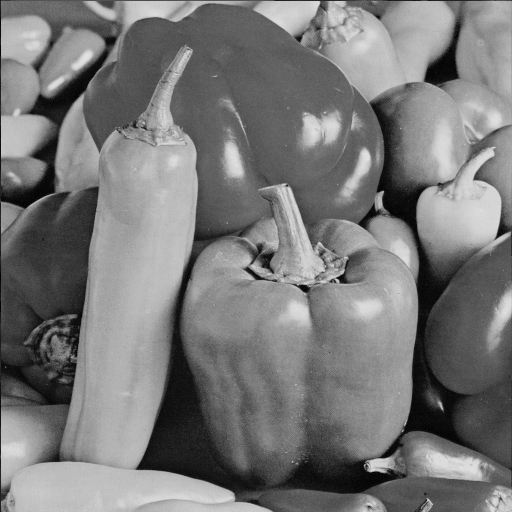

In [5]:
# Исходное изображение без ЦВЗ
model.image

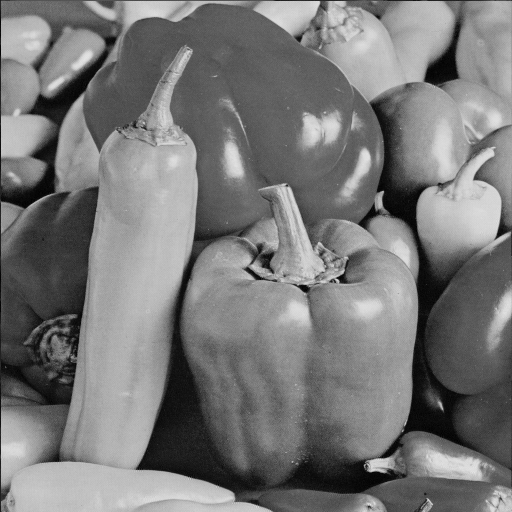

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

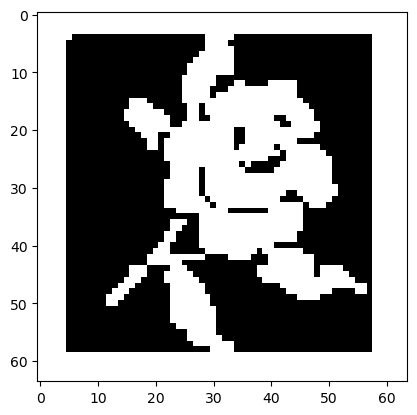

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.48782911077993046

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9962634283045306

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9962634283045306

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.4183467741935484

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9985935302390999

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9843304843304843

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.7435897435897436

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.942262186464742

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

0.9948741845293569

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9845866417561887

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9662921348314607

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8199142448785136

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.7174541947926711

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.6536072623029144

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.8111993946273175

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.927736910428386

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.713477537437604

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9353448275862069

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.5445

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.5280847145488029

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.5320783711102574

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.537864077669903

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

1.0

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

1.0

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

1.0